# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [67]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = browser.html

soup = BeautifulSoup(html, 'html.parser') 

In [7]:
# Extract all rows of data
table = soup.find('table', class_="table")
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# extract headers
headers = table.find_all("th")

titles = []
for i in headers:
    title = i.text
    titles.append(title)

print(titles)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [9]:
# create a data frame
df = pd.DataFrame(columns=titles)

In [10]:
# extract data from rows

rows = table.find_all('tr')
print(rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

In [11]:
# eliminate headers 
for i in rows [1:]:
    print(i.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

In [12]:
# insert data
for i in rows[1:]:
    data = i.find_all("td")
    row = [tr.text for tr in data]
    l = len(df)
    df.loc[l] = row

print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
dataframe = pd.DataFrame(df)


In [14]:
# Confirm DataFrame was created successfully
dataframe.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [28]:
# Examine data type of each column
data_types = dataframe.dtypes
data_types 

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
dataframe['id'] = dataframe['id'].astype('int64')
dataframe['terrestrial_date']= dataframe['terrestrial_date'].astype('datetime64[ns]')
dataframe['sol'] = dataframe['sol'].astype('int64')
dataframe['ls'] = dataframe['ls'].astype('int64')
dataframe['month'] = dataframe['month'].astype('int64')
dataframe['min_temp'] = dataframe['min_temp'].astype('float64')
dataframe['pressure'] = dataframe['pressure'].astype('float64')

In [31]:
# Confirm type changes were successful by examining data types again
data_types = dataframe.dtypes
data_types

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [40]:
dataframe.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


In [44]:
# 1. How many months are there on Mars?
unique_months = dataframe['month'].nunique()

print ("Number of months on Mars: ", unique_months)

  #12 months exist on Mars

Number of months on Mars:  12


In [47]:
# 2. How many Martian days' worth of data are there?
martial_days = dataframe['sol'].count()

print(martial_days, "Martial days worth of data are there")

1867 Martial days worth of data are there


In [55]:
# 3. What is the average low temperature by month?

average_low_temp_by_month = dataframe['min_temp'].mean()

average_low_temp = round(average_low_temp_by_month, 2)

print("The average low temperature by month is " + str(average_low_temp))

The average low temperature by month is -76.12


In [69]:
# Plot the average temperature by month
average_temp_by_month = dataframe.groupby('month')["min_temp"].mean()

average_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [72]:
# convert to dataframe
temp_per_month = pd.DataFrame(average_temp_by_month)
temp_per_month 

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<Figure size 1000x600 with 0 Axes>

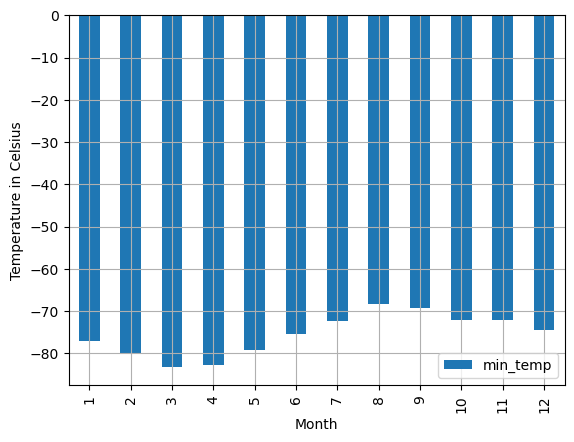

<Figure size 640x480 with 0 Axes>

In [119]:
# plot average temperature by month 

plt.figure(figsize=(10, 6))

# Set plot labels and title
temp_plot = temp_per_month.plot(kind='bar')
temp_plot.set_xlabel("Month")
temp_plot.set_ylabel("Temperature in Celsius")
plt.grid()

# Show the plot
plt.show()
plt.tight_layout()


In [112]:
# 4. Average pressure by Martian month
average_pressure = dataframe.groupby('month')['pressure'].mean() 

average_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

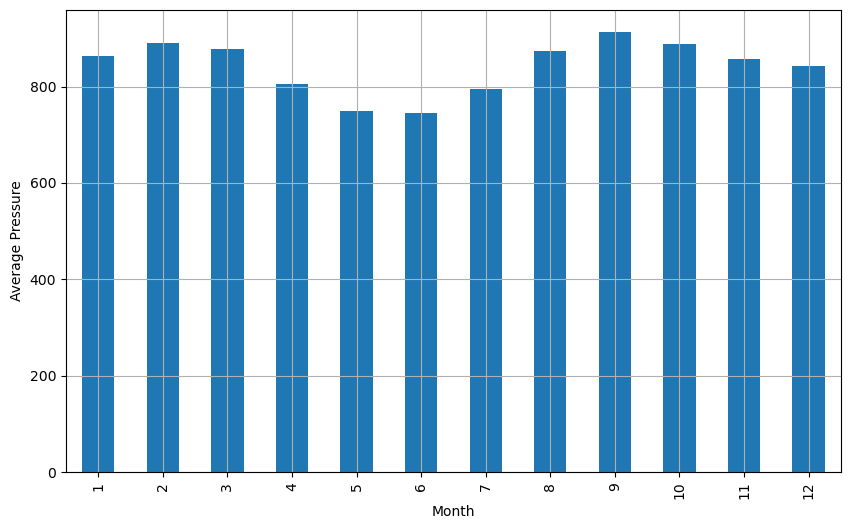

<Figure size 640x480 with 0 Axes>

In [120]:
# plot average pressure by month 

plt.figure(figsize=(10, 6))

# Set plot labels and title
pressure_plot = average_pressure.plot(kind='bar')
pressure_plot.set_xlabel("Month")
pressure_plot.set_ylabel("Average Pressure")
plt.grid()
# Show the plot
plt.show()
plt.tight_layout()


In [146]:
from datetime import datetime

In [172]:
# 5. How many terrestrial (earth) days are there in a Martian year?

start_date = datetime.strptime('2012-08-16', '%Y-%m-%d')
end_date = datetime.strptime('2018-02-27', '%Y-%m-%d')

# Calculate the difference in days
days_difference = (end_date - start_date).days

print(f"Number of days between {start_date.strftime('%Y-%m-%d')} and {end_date.strftime('%Y-%m-%d')}: {days_difference} days")

print(f"There are {days_difference} earth days in a Martian year")



Number of days between 2012-08-16 and 2018-02-27: 2021 days
There are 2021 earth days in a Martian year


In [121]:

terrestrial_days = dataframe['terrestrial_date'].count()

print(terrestrial_days, "Terrestrial (earth) days worth of data are there")

1867 Terrestrial (earth) days worth of data are there


In [155]:
dataframe.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestial_days,terrestrial_days
0,2,2012-08-16,10,155,6,-75.0,739.0,2020,-1 days
1,13,2012-08-17,11,156,6,-76.0,740.0,2020,0 days
2,24,2012-08-18,12,156,6,-76.0,741.0,2020,1 days
3,35,2012-08-19,13,157,6,-74.0,732.0,2020,2 days
4,46,2012-08-20,14,157,6,-74.0,740.0,2020,3 days


In [156]:
dataframe["terrestrial_days"]= dataframe["terrestrial_date"] - start_date
dataframe.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestial_days,terrestrial_days
0,2,2012-08-16,10,155,6,-75.0,739.0,2020,0 days
1,13,2012-08-17,11,156,6,-76.0,740.0,2020,1 days
2,24,2012-08-18,12,156,6,-76.0,741.0,2020,2 days
3,35,2012-08-19,13,157,6,-74.0,732.0,2020,3 days
4,46,2012-08-20,14,157,6,-74.0,740.0,2020,4 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



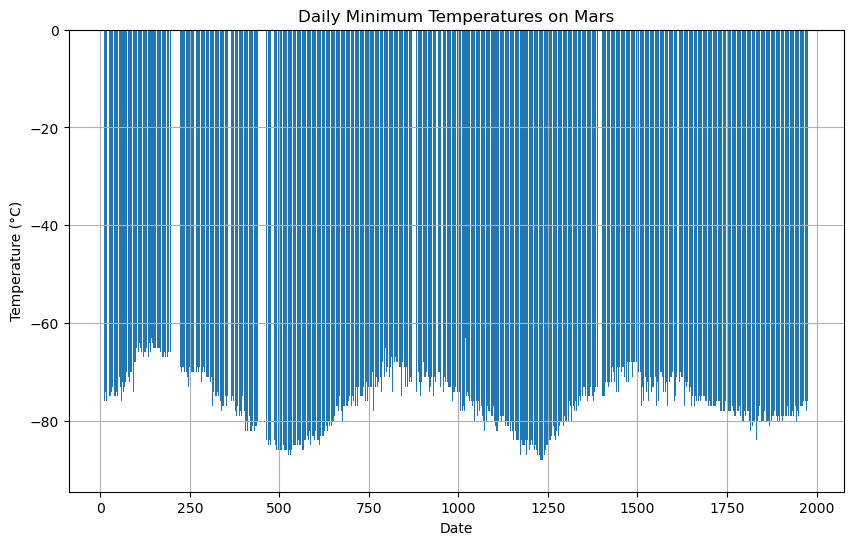

In [171]:
# Visualize the data
plt.figure(figsize=(10, 6))

plt.bar(dataframe['sol'],dataframe['min_temp'])
#earth_days_plot = plt.plot(earth_days['terrestrial_date'], earth_days['min_temp'], marker='o')
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [173]:
# Write the data to a CSV
dataframe.to_csv('Mars_Data.csv', index=False)

In [174]:
browser.quit()